<h1>5. Binary classification </h1>

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('../student-mat.csv', sep=';')
df['finalResult'] = df["G3"].apply(lambda x: 'pass' if x> 9 else 'fail')

<h3>5.1 Preprocess the data. Use the function « ColumnTransformer » to do that. Explain precisely each step, in particular when you drop, impute or transform the variables. Try several approachs.</h3>

 *il y a-t-il des valeurs manquants ?*

In [6]:
df.isnull().any()

school         False
sex            False
age            False
address        False
famsize        False
Pstatus        False
Medu           False
Fedu           False
Mjob           False
Fjob           False
reason         False
guardian       False
traveltime     False
studytime      False
failures       False
schoolsup      False
famsup         False
paid           False
activities     False
nursery        False
higher         False
internet       False
romantic       False
famrel         False
freetime       False
goout          False
Dalc           False
Walc           False
health         False
absences       False
G1             False
G2             False
G3             False
finalResult    False
dtype: bool

 *  *identifier les valeur quantitatifs et qualitatifs*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       395 non-null    object
 1   sex          395 non-null    object
 2   age          395 non-null    int64 
 3   address      395 non-null    object
 4   famsize      395 non-null    object
 5   Pstatus      395 non-null    object
 6   Medu         395 non-null    int64 
 7   Fedu         395 non-null    int64 
 8   Mjob         395 non-null    object
 9   Fjob         395 non-null    object
 10  reason       395 non-null    object
 11  guardian     395 non-null    object
 12  traveltime   395 non-null    int64 
 13  studytime    395 non-null    int64 
 14  failures     395 non-null    int64 
 15  schoolsup    395 non-null    object
 16  famsup       395 non-null    object
 17  paid         395 non-null    object
 18  activities   395 non-null    object
 19  nursery      395 non-null    

**Using as predictors the first 32 variables.**

In [8]:
from sklearn.model_selection import train_test_split

data_y = df['finalResult']
data_x = df.drop(['finalResult','G3','G2'], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.20)

data_x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,7
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,6


**Preprocessing**

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

qualitative_var = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
quantitative_var = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1']

qualitative_pipeline = Pipeline([
     ('encoder', OneHotEncoder(drop = 'first'))
])

quantitative_pipeline = Pipeline([
     ('min_max_scaler', MinMaxScaler())
])
 
preprocessor = ColumnTransformer(remainder='passthrough',
                                 transformers=[
                                   ('transform_quantitatif',qualitative_pipeline, qualitative_var),
                                    ('transform_qualitatif',quantitative_pipeline,quantitative_var),
#                                       
                                 ])

<h3>K-NearestNeighbors</h3> 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN = Pipeline(
    steps=[("preprocess",preprocessor),
           ("KNN",KNeighborsClassifier())])

hyperKNN = {'KNN__n_neighbors':[2,3,4,5],'KNN__p':[1,2,3,4],'KNN__weights':['uniform','distance']}
gridKNN = GridSearchCV(KNN,hyperKNN,cv=3)

gridKNN.fit(x_train,y_train)

modelKNN = gridKNN.best_estimator_

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 

metric_results = {}
def metrics( model, name, result_dic ):
    
    result = model.predict(x_test)
    confusion_m = confusion_matrix(result, y_test)
    ConfusionMatrixDisplay(confusion_m).plot()
    
    sc = model.score(x_test,y_test)
    ps = precision_score(result,y_test,average='macro')
    rs = recall_score(result,y_test,average='macro')
    f1 = f1_score(result,y_test,average='macro')
    
    print(name +' Score :',sc)
    result_dic[name +' Score' ] = sc
    print(name +' Precision Score :',ps)
    result_dic[name +' Precision Score' ] = ps
    print(name +' Recall Score :',rs)
    result_dic[name +' Recall Score' ] = rs
    print(name + ' F1 Score :',f1)
    result_dic[name +' F1 Score' ] = f1
    
     
    
    
#pour evaluer les resultats je fais une prediction sur mes donnees de x_test et 



KNeighbors Score : 0.6835443037974683
KNeighbors Precision Score : 0.6260504201680672
KNeighbors Recall Score : 0.6477832512315271
KNeighbors F1 Score : 0.6302190601011046


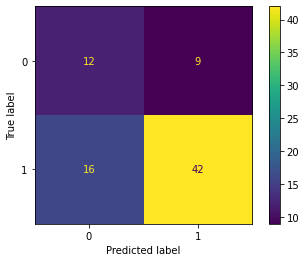

In [12]:
metrics(modelKNN, 'KNeighbors', metric_results)

<h3>Support Vector Machine classifier.</h3> 

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

SVM = Pipeline(
    steps=[("preprocess",preprocessor),
           ("SVM",SVC())])

hyperSVM = {'SVM__C':[1,2,3],'SVM__kernel':['linear', 'poly', 'rbf', 'sigmoid'],'SVM__decision_function_shape':['ovo','ovr']}
gridSVM = GridSearchCV(SVM,hyperSVM,cv=3)

gridSVM.fit(x_train,y_train)
modelSVM = gridSVM.best_estimator_

 

* <h4>confusion matrix, precision, recall ,F1 score.</h4>

Support Vector Machine Score : 0.759493670886076
Support Vector Machine Precision Score : 0.7251400560224089
Support Vector Machine Recall Score : 0.7381481481481482
Support Vector Machine F1 Score : 0.7302785265049415


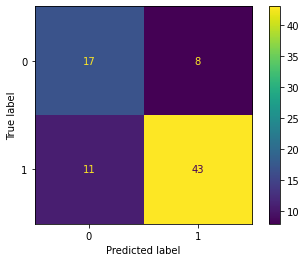

In [14]:
metrics(modelSVM, 'Support Vector Machine', metric_results)

<h3> Linear Discriminant Analysis classifier.</h3> 

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

LDA = Pipeline(
    steps=[("preprocess",preprocessor),
           ("LDA",LinearDiscriminantAnalysis())])

hyperLDA = {'LDA__solver':['svd', 'lsqr', 'eigen'],'LDA__store_covariance':['True','False']}
gridLDA = GridSearchCV(LDA,hyperLDA,cv=3)

gridLDA.fit(x_train,y_train)
modelLDA = gridLDA.best_estimator_

In [16]:
LinearDiscriminantAnalysis().get_params().keys() 

dict_keys(['covariance_estimator', 'n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol'])

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Linear Discriminant Analysis Score : 0.7848101265822784
Linear Discriminant Analysis Precision Score : 0.76890756302521
Linear Discriminant Analysis Recall Score : 0.7648275862068965
Linear Discriminant Analysis F1 Score : 0.7667187771408719


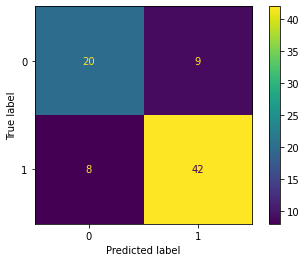

In [17]:
metrics(modelLDA, 'Linear Discriminant Analysis', metric_results)

<h3> Logistic Regression classifier.</h3> 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = Pipeline(
    steps=[("preprocess",preprocessor),
           ("LR",LogisticRegression())])

hyperLR = {'LR__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'LR__max_iter':[200,300]}
gridLR = GridSearchCV(LR,hyperLR,cv=3)

gridLR.fit(x_train,y_train)
modelLR = gridLR.best_estimator_

In [19]:
gridLR.best_params_ 

{'LR__max_iter': 200, 'LR__solver': 'liblinear'}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Logistic Regression Score : 0.7974683544303798
Logistic Regression Precision Score : 0.7626050420168067
Logistic Regression Recall Score : 0.7840909090909092
Logistic Regression F1 Score : 0.7706821480406386


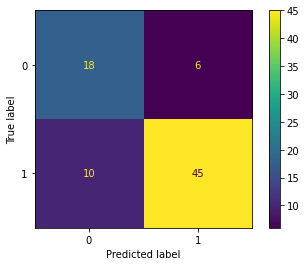

In [20]:
metrics(modelLR, 'Logistic Regression', metric_results)

<h3>Decision Tree classifier.</h3> 

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = Pipeline(
    steps=[("preprocess",preprocessor),
           ("tree",DecisionTreeClassifier(random_state=0))])

hypertree = {"tree__criterion":("gini", "entropy"), "tree__splitter": ["best","random"]}
gridtree = GridSearchCV(tree,hypertree,cv=3)

gridtree.fit(x_train,y_train)
modeltree = gridtree.best_estimator_

In [22]:
gridtree.best_params_ 

{'tree__criterion': 'entropy', 'tree__splitter': 'best'}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Decision Tree Classifier Score : 0.8227848101265823
Decision Tree Classifier Precision Score : 0.8224789915966386
Decision Tree Classifier Recall Score : 0.8061835106382979
Decision Tree Classifier F1 Score : 0.8119047619047619


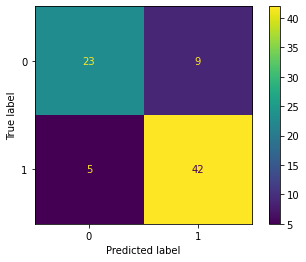

In [23]:
metrics(modeltree, 'Decision Tree Classifier', metric_results)

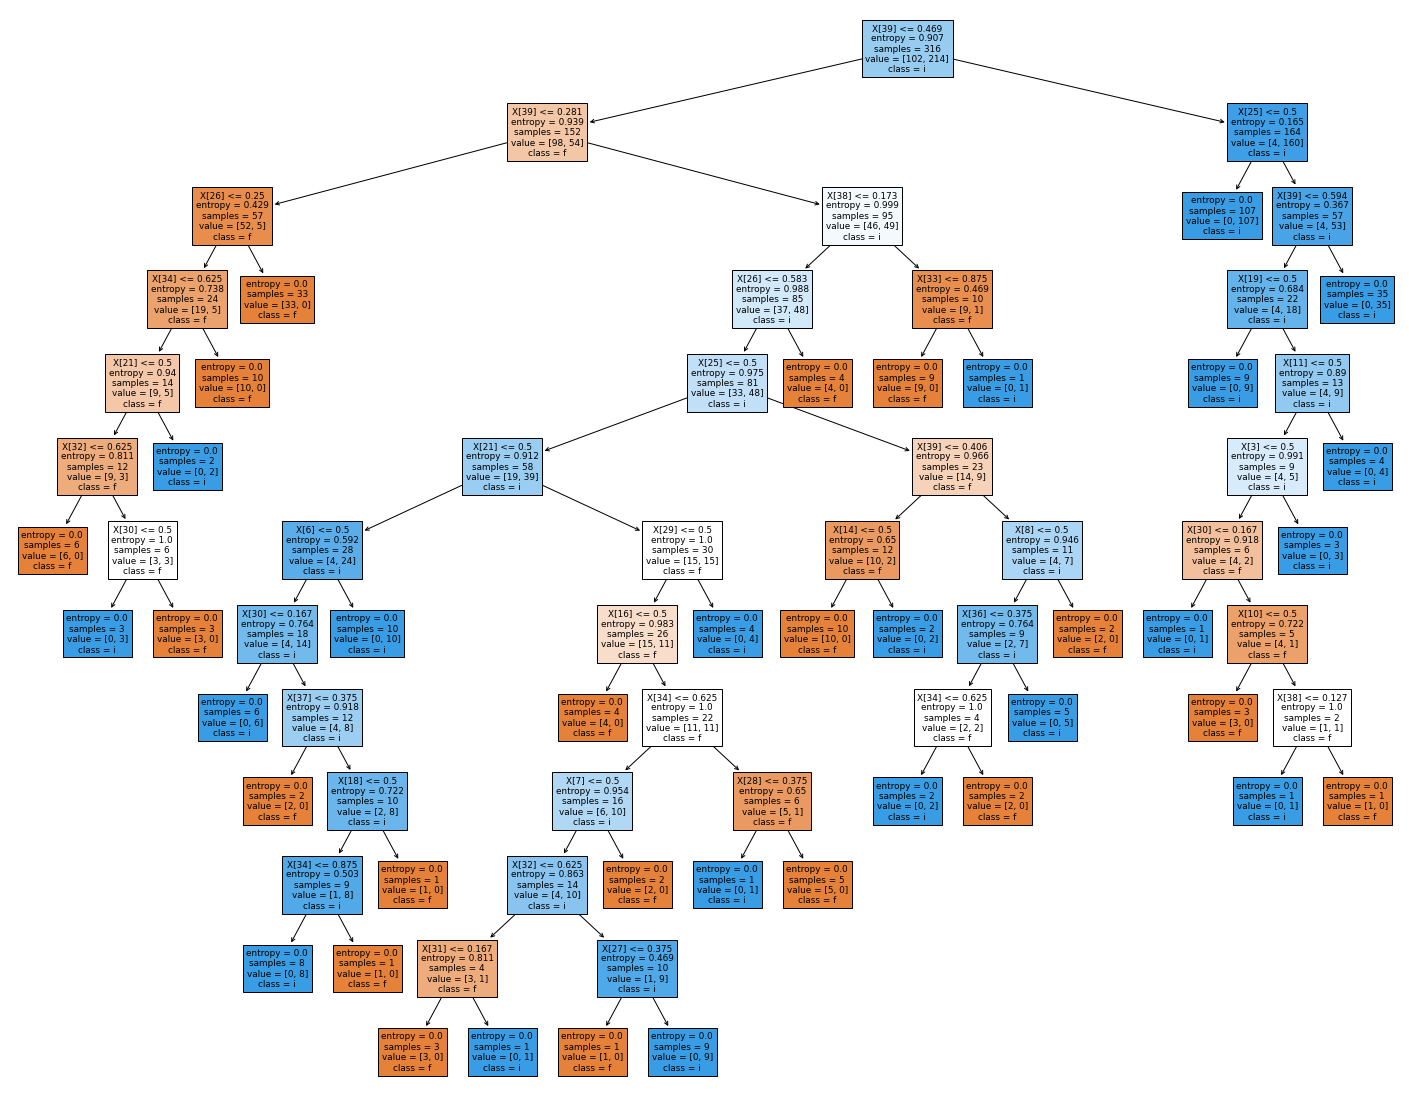

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
temp = quantitative_var.copy()
result = gridtree.best_estimator_
features = temp.append(result['preprocess'].transformers_[0][1][0].get_feature_names())
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(result['tree'], 
                feature_names=features,  
                   class_names='finalResult',
                   filled=True)
fig.savefig("decistion_tree_binary.png")

<h3>Decision Tree classifier.</h3> 

Voting Score : 0.759493670886076
Voting Precision Score : 0.7492997198879552
Voting Recall Score : 0.739247311827957
Voting F1 Score : 0.7430234548878616


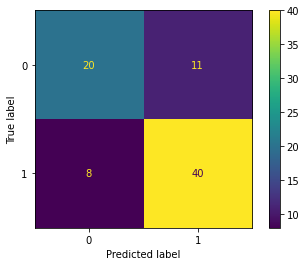

In [25]:
from sklearn.ensemble import VotingClassifier
 
voting = VotingClassifier(estimators=[
        ('KNN', modelKNN),('Support vector machine', modelSVM), ('Logistic Regression', modelLR), ('Tree', modeltree)], voting='hard')
voting = voting.fit(x_train, y_train)
metrics(voting,"Voting",metric_results)


<h3>Random Forest Classifier.</h3> 

In [26]:
from sklearn.ensemble import RandomForestClassifier
 

RF = Pipeline(
    steps=[("preprocess",preprocessor),
           ("RF",RandomForestClassifier())])

hyperRF = {'RF__n_estimators':[100,150,200],'RF__criterion':['gini','entropy'],'RF__max_features':['auto','log2']},
gridRF = GridSearchCV(RF,hyperRF,cv=3)

gridRF.fit(x_train,y_train)
modelRF= gridLR.best_estimator_

In [27]:
gridRF.best_params_ 

{'RF__criterion': 'gini', 'RF__max_features': 'auto', 'RF__n_estimators': 100}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Random Forest Classifier Score : 0.7974683544303798
Random Forest Classifier Precision Score : 0.7626050420168067
Random Forest Classifier Recall Score : 0.7840909090909092
Random Forest Classifier F1 Score : 0.7706821480406386


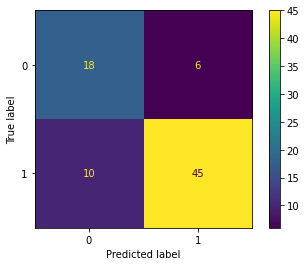

In [28]:
metrics(modelRF, 'Random Forest Classifier', metric_results)

<h3> Gradient Boosting Classifier.</h3> 

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
 

GB = Pipeline(
    steps=[("preprocess",preprocessor),
           ("GB",GradientBoostingClassifier())])

hyperGB = {'GB__n_estimators':[100,150,200],'GB__loss':['deviance','exponential'],'GB__criterion':['friedman_mse','mse',]},
gridGB = GridSearchCV(GB,hyperGB,cv=3)

gridGB.fit(x_train,y_train)
modelGB= gridGB.best_estimator_

In [30]:
gridGB.best_params_ 

{'GB__criterion': 'friedman_mse',
 'GB__loss': 'deviance',
 'GB__n_estimators': 150}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Gradient Boosting Classifier Score : 0.8354430379746836
Gradient Boosting Classifier Precision Score : 0.8242296918767507
Gradient Boosting Classifier Recall Score : 0.8193103448275862
Gradient Boosting Classifier F1 Score : 0.8216084766371374


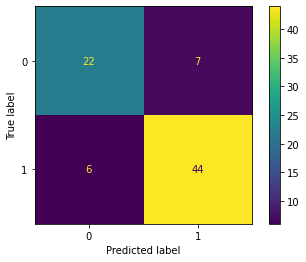

In [31]:
metrics(modelGB, 'Gradient Boosting Classifier', metric_results)

<h3> Ada Boost Classifier.</h3> 

In [32]:
from sklearn.ensemble import AdaBoostClassifier
 

AB = Pipeline(
    steps=[("preprocess",preprocessor),
           ("AB",AdaBoostClassifier())])

hyperAB = {'AB__n_estimators':[50,100,150],'AB__algorithm':['SAMME','SAMME.R'],'AB__learning_rate':[1,2]},
gridAB = GridSearchCV(AB,hyperAB,cv=3)

gridAB.fit(x_train,y_train)
modelAB= gridAB.best_estimator_

In [33]:
gridAB.best_params_ 

{'AB__algorithm': 'SAMME', 'AB__learning_rate': 1, 'AB__n_estimators': 100}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Ada Boost Classifier Score : 0.7974683544303798
Ada Boost Classifier Precision Score : 0.7867647058823529
Ada Boost Classifier Recall Score : 0.7785714285714285
Ada Boost Classifier F1 Score : 0.7820689655172413


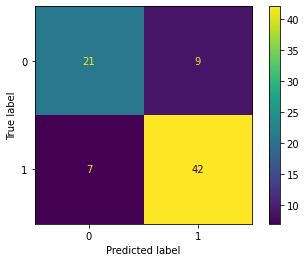

In [34]:
metrics(modelAB, 'Ada Boost Classifier', metric_results)

<h2>Results</h2>

In [35]:
from ipy_table import *

# dictionary
dict = metric_results

# lists
temp = []
dictList = []

# convert the dictionary to a list
for key, value in dict.items():
    temp = [key,value]
    dictList.append(temp)

# create table with make_table
make_table(dictList)

# apply some styles to the table after it is created
set_column_style(0, width='100', bold=True, color='hsla(225, 80%, 94%, 1)')
set_column_style(1, width='100')

# render the table
render()

KNeighbors Score,0.6835
KNeighbors Precision Score,0.6261
KNeighbors Recall Score,0.6478
KNeighbors F1 Score,0.6302
Support Vector Machine Score,0.7595
Support Vector Machine Precision Score,0.7251
Support Vector Machine Recall Score,0.7381
Support Vector Machine F1 Score,0.7303
Linear Discriminant Analysis Score,0.7848
Linear Discriminant Analysis Precision Score,0.7689
Linear Discriminant Analysis Recall Score,0.7648
